# We explore the creation of synthetic apogee spectra

This notebook is about exploring the different tools available within Jo Bovy's Apogee module

In [2]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
from apogee.modelspec import ferre
from apogee.tools import paramIndx
import matplotlib.pyplot as plt
import numpy as np

from apoNN.src.utils import dump as dump 
from apoNN.src.utils import load as load 



def get_parameters(metals,am,cm):
    atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=metals,am=am,cm=cm)
    ferre_synspec= apogee.modelspec.turbospec.synth([6,0],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    errs = np.ones(np.shape(ferre_synspec[0]))*0.01
    ferre_fit = ferre.fit(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    abunds = ferre.elemfitall(ferre_synspec[0],errs,lib='GK',pca=True,sixd=True)
    return ferre_fit,abunds



### Synthetic spectra generation


We generate synthetic spectra using turbospectrum and retrieve their parameters using Ferre. We plot those retrieved parameters

In [ ]:
fparams_list = []
abundances_list = []
cm_range = np.linspace(-1,1,3)
for cm in cm_range:
    fparams,abundances = get_parameters(metals=0,am=0,cm=cm)
    fparams_list.append(fparams)
    abundances_list.append(abundances)

fparams_array = np.concatenate(fparams_list)

In [ ]:
plt.plot([-1,1],[-1,1])
plt.plot(cm_range,fparams_array[:,paramIndx("C")],label="C")
plt.xlabel("cm")
plt.ylabel("C retrieved")
plt.legend()
plt.show()

## We load the modules and define some interfaces

In [12]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import copy
import apogee.spec.plot as splot
import apogee.tools.read as apread
from apogee.modelspec import ferre
from apogee.tools import paramIndx


a_elems = [8,10,12,14,16,18,20,22]
elements= [[7,0.28,0.11],[8,0.03,0.08],[11,-0.05,0.38],[12,0.06,0.08],[13,0.07,0.09],[14,0.05,0.07],[16,0.05,0.1],[19,0.04,0.07],[20,0.02,0.04],[22,-0.01,0.06],[23,-0.01,0.11],[25,-0.04,0.07],[28,0.02,0.04],[15,-0.04,0.18],[24,-0.01,0.06],[27,0,0.15],[37,-0.03,0.29]]


def process_am(abundances):
    """modifies the alpha element abundances so that they are expressed in terms of am, acordingly also estimates and returns the value of am"""
    am = 0
    for i in abundances:
        if i[0] in a_elems:
            am+=i[1]
    am = am/len(a_elems) #get average am value
    for i in abundances:
        if i[0] in a_elems:
           i[1]-=am  #substract am value log(X/alpha)=log((X*Fe)/(alpha*Fe))=log(X/Fe)-log(alpha/Fe)
    return abundances,am


def generate_spectra(t_eff,log_g,metals,abundance_lists,am=0.25,cm=0.):
    atm= atlas9.Atlas9Atmosphere(teff=t_eff,logg=log_g,metals=metals,am=am,cm=cm)
    # The following takes a while ...
    synspec= apogee.modelspec.turbospec.synth(*abundance_lists,modelatm=atm,linelist='201404080919',lsf='all',cont='true',vmacro=6.,isotopes='solar')
    return synspec



In [ ]:
def generate_spectra(t_eff,log_g,metals,abundance_lists,am=0.25,cm=0.):
    atm= atlas9.Atlas9Atmosphere(teff=t_eff,logg=log_g,metals=metals,am=am,cm=cm)
    # The following takes a while ...
    synspec= apogee.modelspec.turbospec.synth(*abundance_lists,modelatm=atm,linelist='201404080919',lsf='all',cont='true',vmacro=6.,isotopes='solar')
    return synspec



### Visually comparing synthetic stars

In this section we create controlled variations in spectra and look at how the outputs change

We plot the difference between two stars identical in all respects but one abundance.

2920 2920                                                                       
2920 2920
[7, 0.060000000000000026, 0.5]


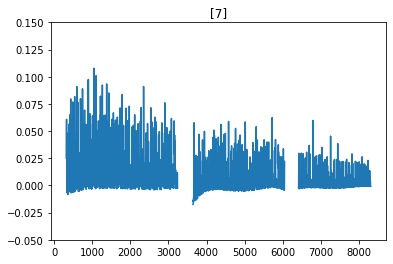

2920 2920                                                                       
2920 2920
[8, -0.13, 0.19]


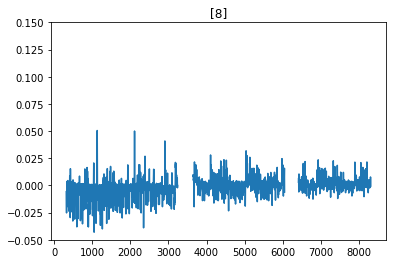

2920 2920                                                                       
2920 2920
[11, -0.81, 0.71]


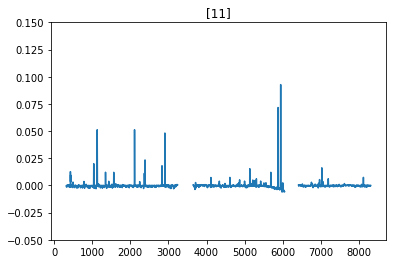

2920 2920                                                                       
2920 2920
[12, -0.1, 0.22]


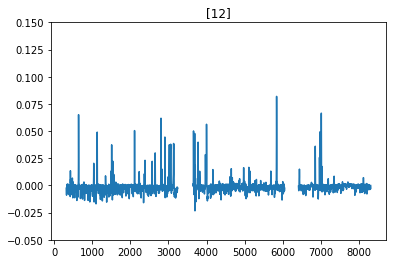

2920 2920                                                                       
2920 2920
[13, -0.10999999999999999, 0.25]


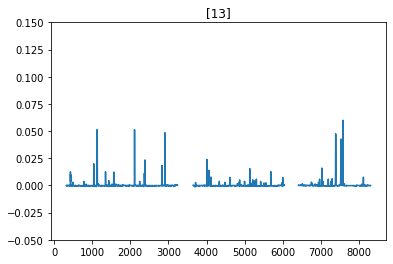

2920 2920                                                                       
2920 2920
[14, -0.09000000000000001, 0.19]


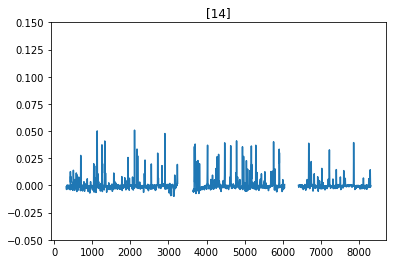

2920 2920                                                                       
2920 2920
[16, -0.15000000000000002, 0.25]


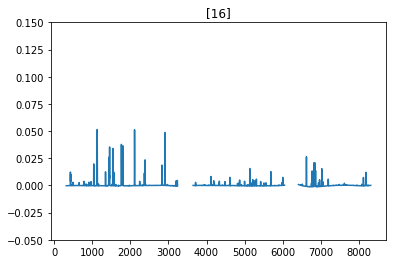

2920 2920                                                                       
2920 2920
[19, -0.1, 0.18000000000000002]


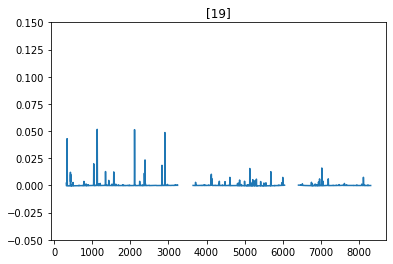

2920 2920                                                                       
2920 2920
[20, -0.06, 0.1]


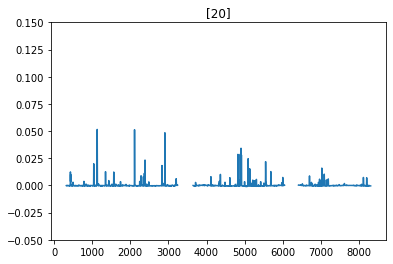

2920 2920                                                                       
2920 2920
[22, -0.13, 0.11]


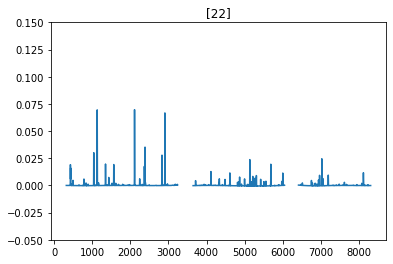

2920 2920                                                                       
2920 2920
[23, -0.23, 0.21]


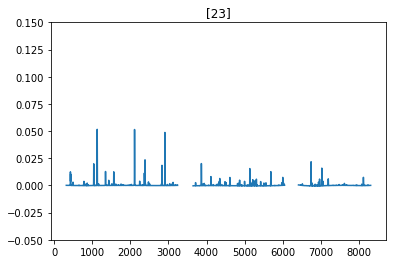

2920 2920                                                                       
2920 2920
[25, -0.18000000000000002, 0.1]


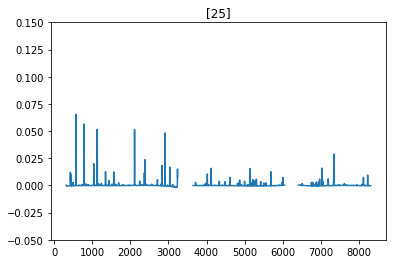

2920 2920                                                                       
2920 2920
[28, -0.06, 0.1]


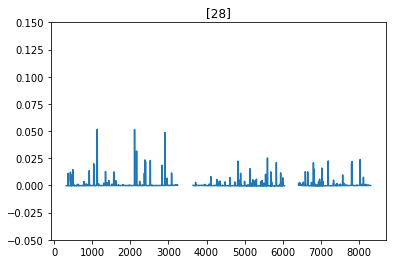

2920 2920                                                                       
2920 2920
[15, -0.39999999999999997, 0.32]


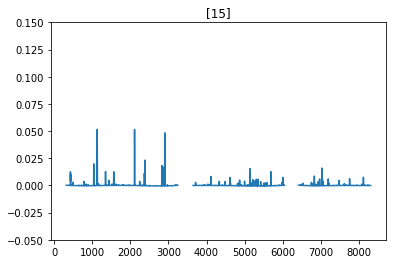

2920 2920                                                                       
2920 2920
[24, -0.13, 0.11]


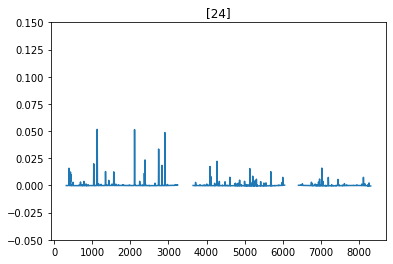

2920 2920                                                                       
2920 2920
[27, -0.3, 0.3]


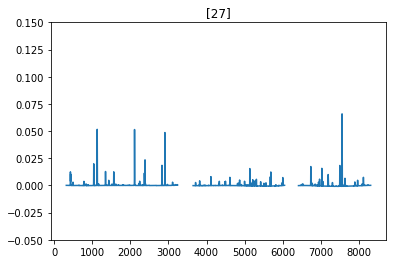

2920 2920                                                                       
2920 2920
[37, -0.61, 0.5499999999999999]


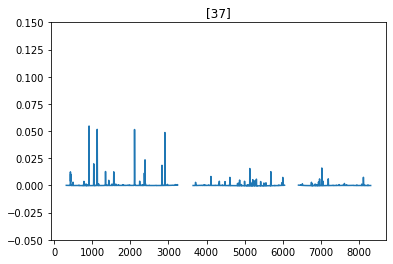

In [13]:
atm= atlas9.Atlas9Atmosphere(teff=4750.,logg=2.5,metals=-0.25,am=0.25,cm=0.25)

spectra_array=[]
for elem in elements:
    elem_id = [elem[0]]
    elem_vals = [elem[1]-2*elem[2],elem[1]+2*elem[2]]
    
    abu = elem_id+elem_vals
    synspec= apogee.modelspec.turbospec.synth(abu,[22,-0.3],modelatm=atm,linelist='201404080919',lsf='all',cont='aspcap',vmacro=6.,isotopes='solar')
    print(elem_id+elem_vals)
    plt.plot(synspec[0]-synspec[1])
    plt.title(elem_id)
    plt.ylim(-0.05,0.15)    
    plt.show()
    spectra_array.append([elem_id,synspec])

(-0.05, 0.15)

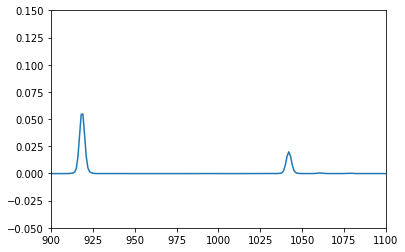

In [15]:
plt.plot(spectra_array[-1][-1][0]-spectra_array[-1][-1][1])
plt.xlim(900,1100)
plt.ylim(-0.05,0.15)    


### Splot

Spot allows us to focus on the regions of the spectra corresponding to certain elemental transitions

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:89: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True^numpy.isnan(win))).astype('int')

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in less
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in greater
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/plot.py:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  thisax= pyplot.axes([0.1+(0.85-totdx)*2.,0.125,totdx,0.8])

/share/splinter/ddm/tagge

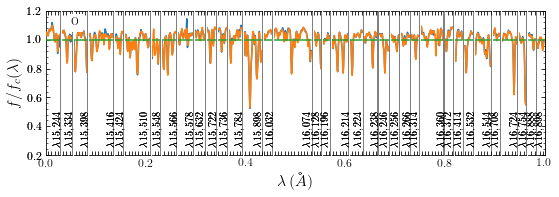

In [17]:
idx = 0
elem = "O"
splot.windows(load("x")[idx].numpy(),elem)
splot.windows(load("x_pred")[idx].detach().cpu().numpy(),elem,overplot=True)
splot.windows(load("mask")[idx].detach().cpu().numpy(),elem,overplot=True)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:89: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True^numpy.isnan(win))).astype('int')

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in less
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in greater
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/plot.py:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  thisax= pyplot.axes([0.1+(0.85-totdx)*2.,0.125,totdx,0.8])

/share/splinter/ddm/tagge

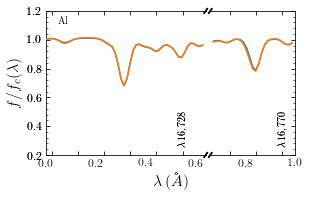

In [18]:
splot.windows(spectra_array[0][-1][0],'Al')
splot.windows(spectra_array[0][-1][1],'Al',overplot=True,)

IndexError: list index out of range

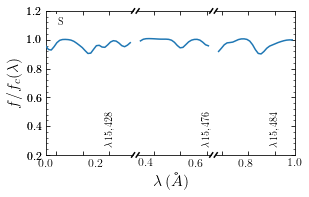

In [19]:
splot.windows(spectra_array[6][-1][0],'S')
splot.windows(spectra2_array[6][-1][0],'S',overplot=True,)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:89: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True^numpy.isnan(win))).astype('int')

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in less
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in greater
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/plot.py:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  thisax= pyplot.axes([0.1+(0.85-totdx)*2.,0.125,totdx,0.8])

/share/splinter/ddm/tagge

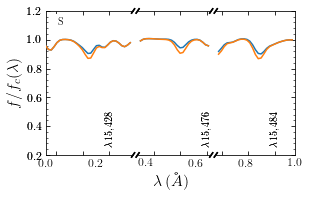

In [20]:
splot.windows(spectra_array[6][-1][0],'S')
splot.windows(spectra_array[6][-1][1],'S',overplot=True,)

### Looking at genuine APOGEE stars

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/plot.py:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  thisax= pyplot.axes([0.1+(0.85-totdx)*2.,0.125,totdx,0.8])



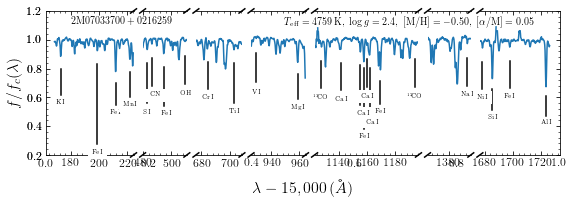

In [32]:
data= apread.rcsample()
indx= data['SNR'] > 200.
data= data[indx]
splot.waveregions(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],ext=1,
                  labelID=data[3512]['APOGEE_ID'],
                  labelTeff=data[3512]['TEFF'],
                  labellogg=data[3512]['LOGG'],
                  labelmetals=data[3512]['METALS'],
                  labelafe=data[3512]['ALPHAFE'])

In [33]:
from apogee.tools import download
download.ferreModelLibrary(lib='GK',pca=True,sixd=True,unf=False,dr=None,convertToBin=True)

path is 
/share/splinter/ddm/modules/turbospectrum/spectra/dr12/apogee/spectro/redux/speclib/asset/kurucz_filled/solarisotopes/asGK_131216_lsfcombo5v6


In [34]:
import apogee.tools.path as appath
print(appath.ferreModelLibraryPath())

/share/splinter/ddm/modules/turbospectrum/spectra/dr12/apogee/spectro/redux/speclib/asset/kurucz_filled/solarisotopes/asGK_131216_lsfcombo5v6/p6_apsasGK_131216_lsfcombo5v6_w123.dat


In [35]:
from apogee.modelspec import ferre
params= ferre.fit(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],pca=True,sixd=True)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:89: RuntimeWarning: invalid value encountered in greater
  mask= ((win > 0.)*(True^numpy.isnan(win))).astype('int')

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in less
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/window.py:201: RuntimeWarning: invalid value encountered in greater
  *(win > 0.1)

/share/splinter/ddm/taggenv/lib64/python3.6/site-packages/apogee/spec/plot.py:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  thisax= pyplot.axes([0.1+(0.85-totdx)*2.,0.125,totdx,0.8])

/share/splinter/ddm/tagge

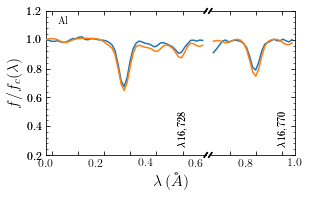

In [36]:
splot.windows(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],'Al')
splot.windows(spectra_array[4][-1][1],'Al',overplot=True,)